In [4]:
import pandas as pd
import pickle
from datetime import datetime
import numpy as np
from __future__ import division
from sklearn import cross_validation, datasets, linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def Season(x):
    y = x.month
    if y in [12,1,2]:
        return 'Winter'
    elif y in range(3,6):
        return 'Spring'
    elif y in range(6,9):
        return 'Summer'
    else:
        return 'Fall'

In [2]:
def data_clean(df):
    df = df.rename(columns = {'Worldwide Box Office':'International Box Office'})
    df['International Box Office'] = df['International Box Office'].str.replace('$', '')
    df['International Box Office'] = df['International Box Office'].str.replace(',', '')
    df.ix[df['International Box Office'].isnull()==False, 'International Box Office'] = [int(r) for r in df['International Box Office'] if r != None]

    df['Running Time'] = df['Running Time'].str.replace(' minutes','')
    df.ix[df['Running Time'].isnull()==False, 'Running Time'] = [int(r) for r in df['Running Time'] if r != None]

    df['Domestic DVD Sales'] = df['Domestic DVD Sales'].str.replace('$', '')
    df['Domestic DVD Sales'] = df['Domestic DVD Sales'].str.replace(',', '')
    df.ix[df['Domestic DVD Sales'].isnull()==False, 'Domestic DVD Sales'] = [int(r) for r in df['Domestic DVD Sales'] if r != None]

    df['Production Budget'] = df['Production Budget'].str.replace('$', '')
    df['Production Budget'] = df['Production Budget'].str.replace(',', '')
    df.ix[df['Production Budget'].isnull()==False, 'Production Budget'] = [int(r) for r in df['Production Budget'] if r != None]
    
    df['Opening'] = df['Opening'].str.replace('$', '')
    df['Opening'] = df['Opening'].str.replace(',', '')
    df.ix[df['Opening'].isnull()==False, 'Opening'] = [int(r) for r in df['Opening'] if r != None]
    df = df[df['Release Date'] < datetime(2016,10,06)]
    df = df[df['Release Date'] > datetime(1998,01,01)]
    df = df[df['Domestic DVD Sales'].isnull()==False]
    del df['Distributor']
    del df['Domestic Blu-ray Sales']
    del df['Movie']
    del df['Genre']
    df['Running Time']=df['Running Time'].replace('None',np.nan)
    df['Opening']=df['Opening'].replace('None',np.nan)
    df['Production Budget']=df['Production Budget'].replace('None',np.nan)
    df['Domestic Gross']=df['Domestic Gross'].replace('None',np.nan)
    df['Inflation-Adjusted Gross']=df['Inflation-Adjusted Gross'].replace('None',np.nan)
    df['International Box Office']=df['International Box Office'].replace('None',np.nan)
    df['Season'] = df["Release Date"].apply(Season)
    df['Running Time']=df['Running Time'].fillna(df['Running Time'].mean())
    df['International Box Office']=df['International Box Office'].fillna(df['International Box Office'].mean())
    df['Opening']=df['Opening'].fillna(df['Opening'].mean())
    df = df[df['Production Budget'].isnull()==False]
    df = df[df['MPAA Rating'].isnull()==False]
    del df['Release Date']
    df = pd.get_dummies(df, columns=['Season','MPAA Rating'])

    return df

In [6]:
df_Hor = pd.read_pickle('resultsHor.pkl')
Hor = data_clean(df_Hor)

In [709]:
df_Thr = pd.read_pickle('resultsThr.pkl')
Thr = data_clean(df_Thr)

In [710]:
df_Act = pd.read_pickle('resultsAct.pkl')
Act = data_clean(df_Act)

In [711]:
df_Dra = pd.read_pickle('resultsDra.pkl')
Dra = data_clean(df_Dra)

In [712]:
df_Adv = pd.read_pickle('resultsAdv.pkl')
Adv = data_clean(df_Adv)

In [713]:
df_Com = pd.read_pickle('resultsCom.pkl')
Com = data_clean(df_Com)

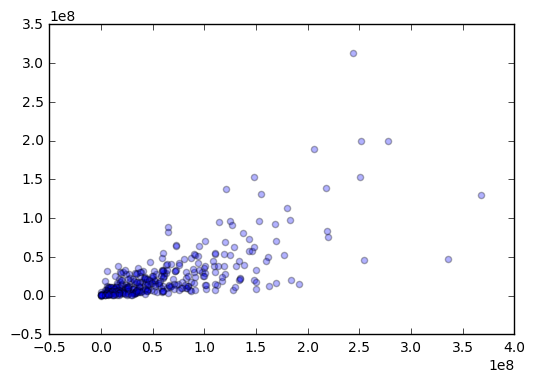

In [472]:
plt.scatter(Com['Domestic Gross'],Com['Domestic DVD Sales'], alpha=.3)

In [27]:
type(df_Dra2.iloc[13]['Running Time'])

numpy.float64

In [232]:
type(df_Dra2.iloc[13]['MPAA Rating'])

bs4.element.NavigableString

In [544]:
Act_y = Act['Domestic DVD Sales']
Act_x = Act.copy()
del Act_x['Domestic DVD Sales']

In [549]:
Act_x_train, Act_x_test, Act_y_train, Act_y_test = cross_validation.train_test_split(
                                        Act_x, Act_y, test_size=0.3)

In [434]:
Com_X2 = Com_X.drop(['Domestic Gross', 'Production Budget', 'Opening', 'Inflation-Adjusted Gross', 'International Box Office'],axis=1)

In [435]:
Com_X2_train, Com_X2_test, Com_y_train, Com_y_test = cross_validation.train_test_split(
                                        Com_X2, Com_Y, test_size=0.3)

In [ ]:
df = df.drop(['x','y'], axis=1)

In [7]:
def models_run(df):
    df_y = df['Domestic DVD Sales']
    df_x = df.copy()
    del df_x['Domestic DVD Sales']

    df_x_train, df_x_test, df_y_train, df_y_test = cross_validation.train_test_split(df_x, df_y, test_size=0.3)
    for a in [0.01, 0.1, 1]:
        models = {}
        models['lin_reg'+str(a)] = linear_model.LinearRegression()
        models['ridge'+str(a)] = linear_model.Ridge(alpha=a)
        models['lasso'+str(a)] = linear_model.Lasso(alpha=a)
        models['elasticnet'+str(a)] = linear_model.ElasticNet(alpha=a)
        for name,model in models.iteritems():
            model.fit(df_x_train,df_y_train)
            print('Model: '+name)
            print("Score: " + str(model.score(df_x_test,df_y_test)))
            sorted_features = sorted(zip(df_x.columns,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
            for feature in sorted_features:
                print(feature)

            print("")

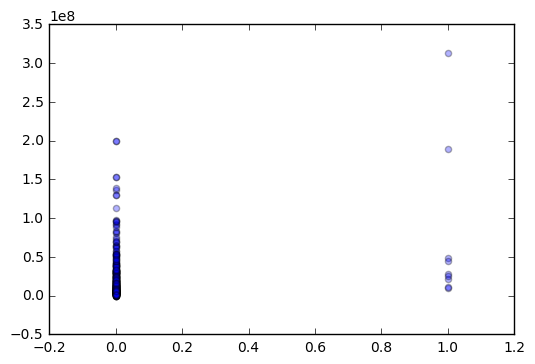

In [297]:
plt.scatter(Com_X['MPAA Rating_G'],Com_Y, alpha=.3)

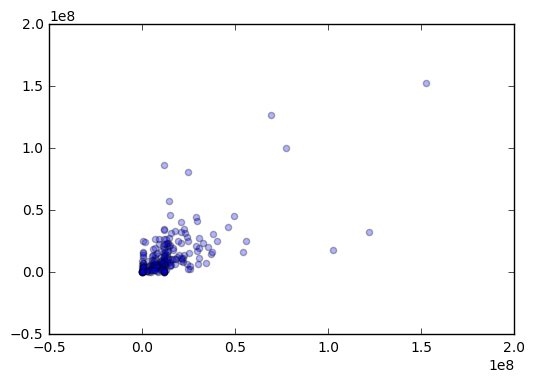

In [611]:
plt.scatter(Thr['Opening'],Thr['Domestic DVD Sales'], alpha=.3)

In [662]:
Act['Genre'] = 'Action'

In [663]:
Com['Genre'] = 'Comedy'
Thr['Genre'] = 'Thriller'
Hor['Genre'] = 'Horror'
Adv['Genre'] = 'Adventure'
Dra['Genre'] = 'Drama'

In [664]:
df = pd.concat([Act,Adv,Thr,Hor,Com,Dra])

In [665]:
del df['MPAA Rating']

In [666]:
df.columns

Index([u'Domestic DVD Sales', u'Domestic Gross', u'Inflation-Adjusted Gross',
       u'International Box Office', u'Opening', u'Production Budget',
       u'Running Time', u'Season_Fall', u'Season_Spring', u'Season_Summer',
       u'Season_Winter', u'Genre'],
      dtype='object')

In [667]:
df = pd.get_dummies(df, columns=['Genre'])

In [744]:
y = df['Domestic DVD Sales']
x = df.copy()
del x['Domestic DVD Sales']

In [745]:
x = sm.add_constant(x)

In [746]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3)

In [743]:
df

,Domestic DVD Sales,Domestic Gross,Inflation-Adjusted Gross,International Box Office,Opening,Production Budget,Running Time,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Genre_Action,Genre_Adventure,Genre_Comedy,Genre_Drama,Genre_Horror,Genre_Thriller
508,18823652,30471,47655,3.814030e+05,19930.0,7000000.0,111.929167,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
552,10116612,108638745,157650509,5.105234e+07,179823.0,95000000.0,144.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
641,18734204,154696080,203445852,1.760210e+08,56061504.0,87500000.0,106.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
654,15730341,10169202,13373841,1.280000e+07,4670120.0,50000000.0,111.929167,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
655,27881446,36020063,47361595,2.150000e+07,12211986.0,22000000.0,111.929167,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
657,21991031,25857987,33980968,2.209535e+07,12661112.0,55000000.0,111.929167,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
659,10877394,2405420,3095825,1.200000e+06,1550000.0,25000000.0,92.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
660,61820422,62318875,80205819,5.109889e+07,26857181.0,45000000.0,111.929167,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
661,9531120,1502188,1933345,3.241135e+07,86985.0,4200000.0,111.929167,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
663,20180024,36895141,47484883,2.870000e+07,11855260.0,45000000.0,105.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [645]:
for i in df.columns:
    print(i, (df[i].isnull().sum())/len(df))

('Domestic DVD Sales', 0.0)
('Domestic Gross', 0.0)
('Inflation-Adjusted Gross', 0.0)
('International Box Office', 0.0)
(u'MPAA Rating_Not\xa0Rated', 0.083959044368600688)
('Opening', 0.0)
('Production Budget', 0.0)
('Running Time', 0.0)
('Season_Fall', 0.0)
('Season_Spring', 0.0)
('Season_Summer', 0.0)
('Season_Winter', 0.0)
('Genre_Action', 0.0)
('Genre_Adventure', 0.0)
('Genre_Comedy', 0.0)
('Genre_Drama', 0.0)
('Genre_Horror', 0.0)
('Genre_Thriller', 0.0)


In [696]:
df2 = df.drop(['Inflation-Adjusted Gross'])

In [704]:
def run2(df):
    df_y = df['Domestic DVD Sales']
    df_x = df.copy()
    del df_x['Domestic DVD Sales']
    sum=0
    for i in range(1000):
        df_x_train, df_x_test, df_y_train, df_y_test = cross_validation.train_test_split(df_x, df_y, test_size=0.3)
    
        model = linear_model.LinearRegression()
        
        model.fit(df_x_train,df_y_train)
        score=model.score(df_x_test,df_y_test)
        sum += score
    print(sum/1000)

In [720]:
run2(df)

6.41390787451


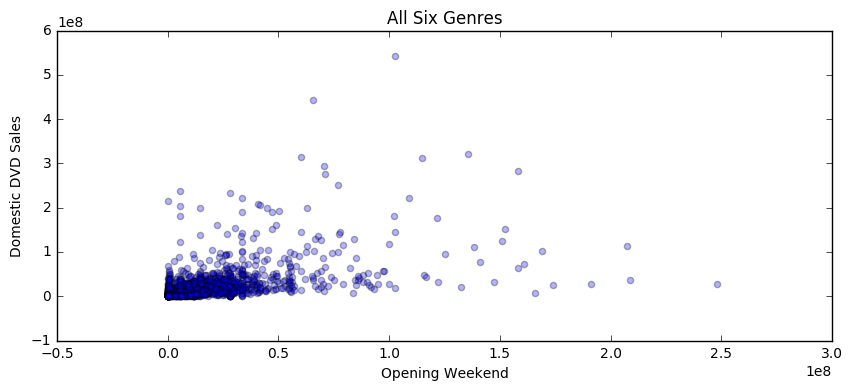

In [739]:
plt.figure(figsize=(10, 4))
plt.scatter(df['Opening'],df['Domestic DVD Sales'], alpha=.3)
plt.xlabel('Opening Weekend')
plt.ylabel('Domestic DVD Sales')
plt.title('All Six Genres');

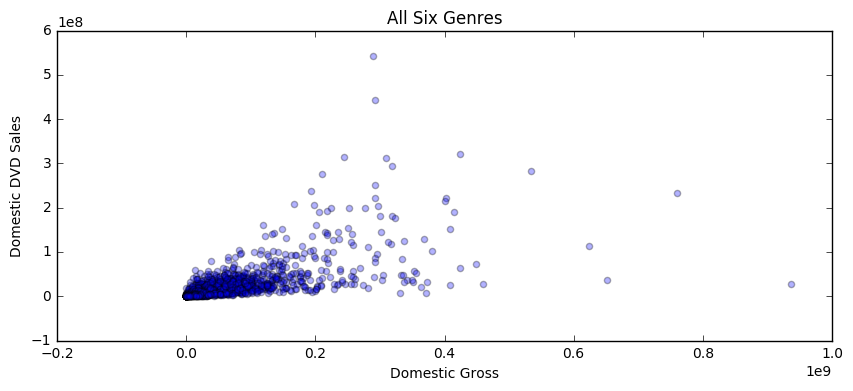

In [738]:
plt.figure(figsize=(10, 4))
plt.scatter(df['Domestic Gross'],df['Domestic DVD Sales'], alpha=.3)
plt.xlabel('Domestic Gross')
plt.ylabel('Domestic DVD Sales')
plt.title('All Six Genres');

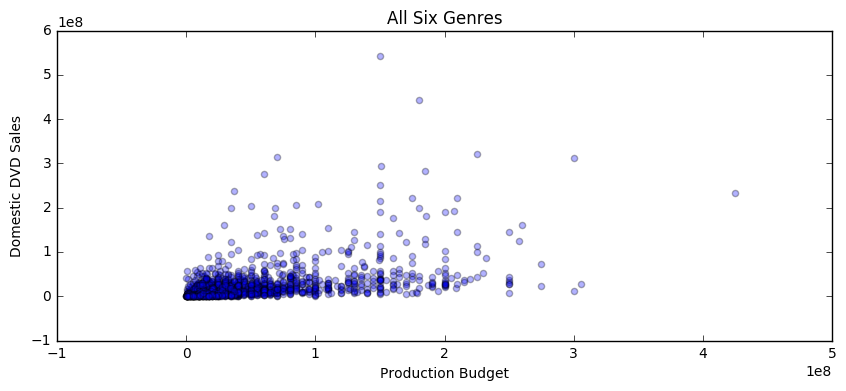

In [737]:
plt.figure(figsize=(10, 4))
plt.scatter(df['Production Budget'],df['Domestic DVD Sales'], alpha=.3)
plt.xlabel('Production Budget')
plt.ylabel('Domestic DVD Sales')
plt.title('All Six Genres');

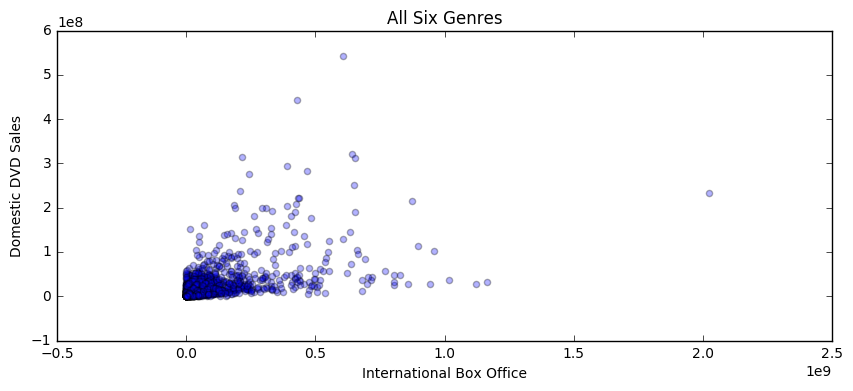

In [736]:
plt.figure(figsize=(10, 4))
plt.scatter(df['International Box Office'],df['Domestic DVD Sales'], alpha=.3)
plt.xlabel('International Box Office')
plt.ylabel('Domestic DVD Sales')
plt.title('All Six Genres');

In [731]:
folds = cross_validation.KFold(len(df_x), n_folds=2, shuffle=True, random_state=0)